In [120]:
#Instalar las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [121]:
Data = pd.read_csv("C:/Users/Felipe Galvis/Documents/Python/CleanedData.csv")

In [122]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [123]:
"""Nuestra Columna objetivo sera la columna Severity y podremos predecir que tan severo será la enfermedad para
la persona, pero como en el dataset la severidad está divido en varias columnas, lo que harémos será unir las 
columnas en una sola"""

def find_severity(row):
    cols = list(row.index)
    index = cols.index('Severity_Mild')
    for i in range(index, len(cols)):
        if row[i] == 1:
            return i - index
    return -1

Data ['Severity'] = Data.apply(lambda row: find_severity(row), axis=1)
Data.drop(['Severity_Mild', 'Severity_Moderate', 'Severity_None', 'Severity_Severe'], axis=1, inplace=True)
Data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Severity
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,1,China,0
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,1,0,China,0
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,1,0,0,China,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,1,China,1
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,1,0,China,1


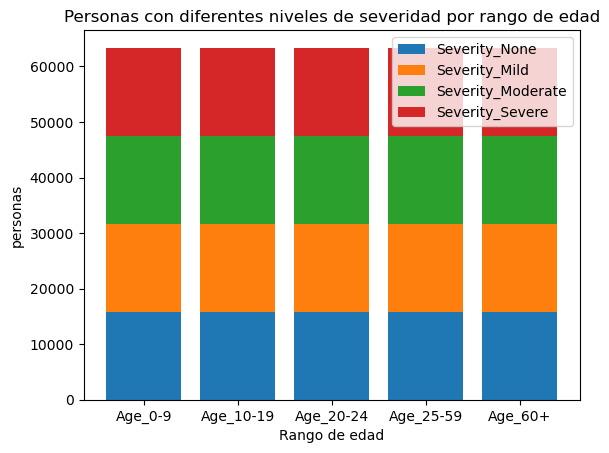

In [124]:
"""Gráficas Exploratorias - Edad vs Severidad """

df_age_severity = Data[['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Severity']]

# Calcular la cantidad de personas en cada rango de edad con cada nivel de severidad
severity_by_age = df_age_severity.groupby('Severity').sum()

# Graficar los resultados
plt.bar(severity_by_age.columns, severity_by_age.loc[0], label='Severity_None')
plt.bar(severity_by_age.columns, severity_by_age.loc[1], label='Severity_Mild', bottom=severity_by_age.loc[0])
plt.bar(severity_by_age.columns, severity_by_age.loc[2], label='Severity_Moderate', bottom=severity_by_age.loc[0]+severity_by_age.loc[1])
plt.bar(severity_by_age.columns, severity_by_age.loc[3], label='Severity_Severe', bottom=severity_by_age.loc[0]+severity_by_age.loc[1]+severity_by_age.loc[2])
plt.title('Personas con diferentes niveles de severidad por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('personas')
plt.legend()
plt.show()

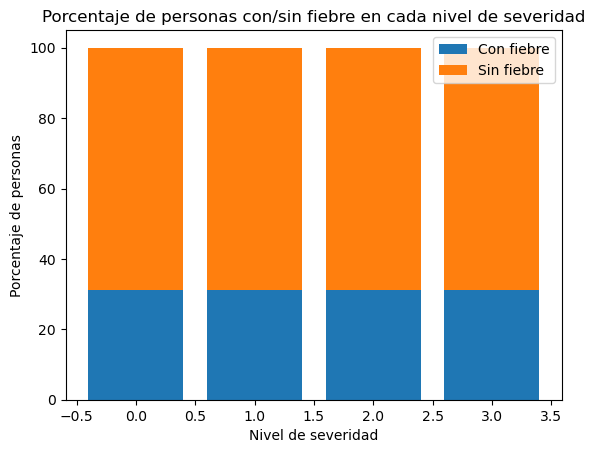

In [125]:
"""Fiebre Vs Severidad"""

df_fever_severity = Data[['Fever', 'Severity']]

# Calcular la cantidad total de personas en cada nivel de severidad
total_by_severity = df_fever_severity.groupby('Severity').size()

# Calcular la cantidad de personas con cada nivel de severidad que tienen fiebre
fever_by_severity = df_fever_severity[df_fever_severity['Fever'] == 1].groupby('Severity').size()

# Calcular los porcentajes de personas con fiebre en cada nivel de severidad
percentages_with_fever = fever_by_severity / total_by_severity * 100

# Calcular los porcentajes de personas sin fiebre en cada nivel de severidad
percentages_without_fever = 100 - percentages_with_fever

# Graficar los resultados
plt.bar(percentages_with_fever.index, percentages_with_fever.values, label='Con fiebre')
plt.bar(percentages_without_fever.index, percentages_without_fever.values, bottom=percentages_with_fever.values, label='Sin fiebre')
plt.title('Porcentaje de personas con/sin fiebre en cada nivel de severidad')
plt.xlabel('Nivel de severidad')
plt.ylabel('Porcentaje de personas')
plt.legend()
plt.show()

In [126]:
"""Se eviidencia que el conjunto de datos tiene valores muy homogeneos, por lo que es bueno para realizar un entrenamiento de modelo

Para la columna pais lo que se hará es converitr esta columna a valores numericos, para poder utilizar los paises en el entrenamiento"""

# Obtener una lista de países únicos en la columna de "Country"
unique_countries = Data['Country'].unique()

# Crear un diccionario de mapeo de países a números
country_mapping = {country: i for i, country in enumerate(unique_countries)}

# Imprimir el diccionario de mapeo
print(country_mapping)

# Aplicar el mapeo a la columna de "Country"
Data['Country'] = Data['Country'].map(country_mapping)

{'China': 0, 'Italy': 1, 'Iran': 2, 'Republic of Korean': 3, 'France': 4, 'Spain': 5, 'Germany': 6, 'UAE': 7, 'Other-EUR': 8, 'Other': 9}


In [127]:
""" Diccionario donde podemos identifica qué número identifica qué país """
df_country_mapping = pd.DataFrame.from_dict(country_mapping, orient='index', columns=['Country_Num'])
df_country_mapping

,Country_Num
China,0
Italy,1
Iran,2
Republic of Korean,3
France,4
Spain,5
Germany,6
UAE,7
Other-EUR,8
Other,9


In [170]:
"""entrenamiento modelo KNN"""

var_Y = ['Severity']
var_X = [v for v in Data if v not in var_Y]
y = Data['Severity']
X = Data[var_X]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
# Crear el modelo K-NN con k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y.pred = knn.predict(X_test)

In [173]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 8.44%
